In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
"""
Imports
"""

import os
from dataclasses import dataclass

import lightning as L
import lightning.pytorch as pl
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T
import torchvision.transforms.functional as TF

torch.set_float32_matmul_precision('medium')

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load Dataset

In [118]:
from cifar10_train import CIFAR10DataModule
dm = CIFAR10DataModule()

In [119]:
dm.setup(stage='fit')

12:35:06 | DEBUG    | X_train  - (40000, 3, 32, 32), float64
12:35:06 | DEBUG    | X_val    - (10000, 3, 32, 32), float64
12:35:06 | DEBUG    | y_train  - (40000,), int32
12:35:06 | DEBUG    | y_val    - (10000,), int32
12:35:06 | DEBUG    | Convert numpy to tensor
12:35:06 | DEBUG    | X_train  - torch.Size([40000, 3, 32, 32]), torch.float32
12:35:06 | DEBUG    | X_val    - torch.Size([10000, 3, 32, 32]), torch.float32
12:35:06 | DEBUG    | y_train  - torch.Size([40000]), torch.float32
12:35:06 | DEBUG    | y_val    - torch.Size([10000]), torch.float32
Total Dataset       : 50000 samples
Train Dataset       : 40000 samples
Validation Dataset  : 10000 samples


# Visualize Samples

In [120]:
CLASS_NAMES = [
    'airplane', 'automobile', 'bird',
    'cat', 'deer', 'dog', 'frog',
    'horse', 'ship', 'truck'
]

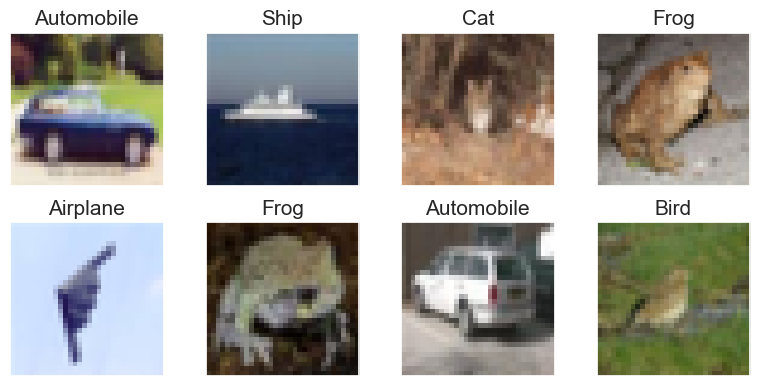

In [128]:
from utils.common import show_grid

image_list = []
labels_list = []

for i in range(8):
    label, image = dm.train_dataset[i]
    
    image = image.squeeze(0)
    image_list.append(image)
    
    label = CLASS_NAMES[int(label)]
    labels_list.append(label.capitalize())

show_grid(image_list, labels_list, cols=4)

# Digit Distribution

In [122]:
np.arange(11) - 0.5

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5])

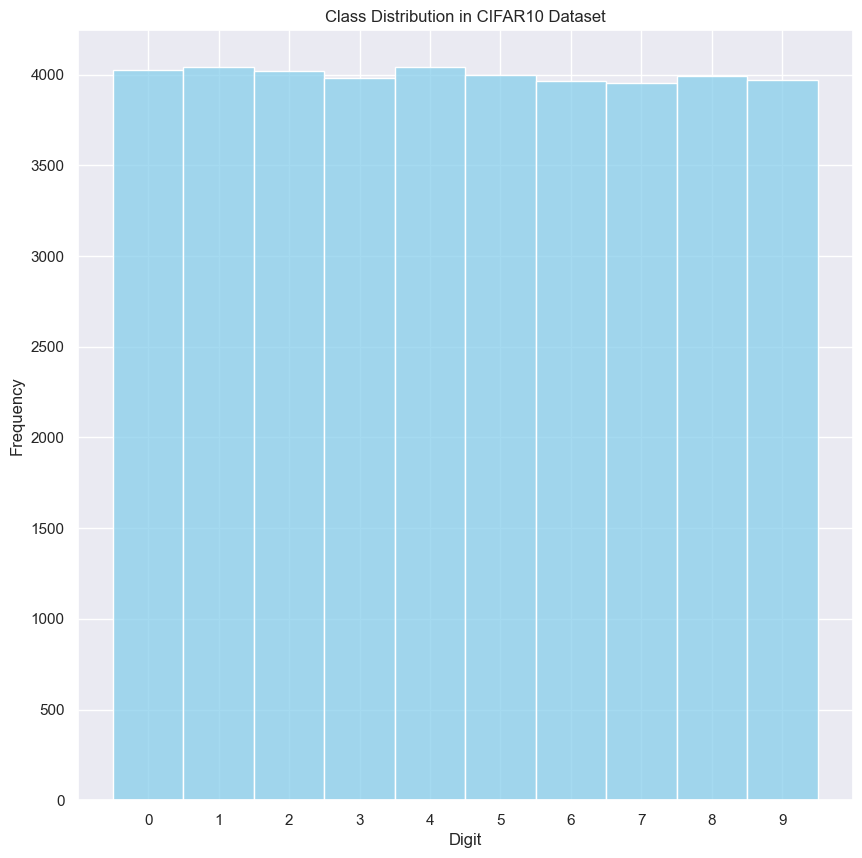

In [123]:
# Step 3: Check the Distribution of Classes (Digits)
def plot_class_distribution(dataset):
    labels = [label.item() for label, _ in dataset]
    
    sns.histplot(
        labels, 
        bins=np.arange(11) - 0.5, 
        kde=False, 
        color='skyblue'
    )
    
    plt.xticks(range(10))
    plt.xlabel('Digit')
    plt.ylabel('Frequency')
    plt.title('Class Distribution in CIFAR10 Dataset')
    plt.show()

# Plot the class distribution in the training set
plot_class_distribution(dm.train_dataset)

# Check Model Shapes

In [3]:
from cifar10_train import CIFAR10Model
model = CIFAR10Model()

In [5]:
model.model.layer4

Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (downsample): Sequential(
      (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): BasicBlock(
    (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1

In [136]:
dummy_input = torch.randn(8, 3, 32, 32)  # batch_size of 8
output = model(dummy_input)
output.shape

14:28:11 | DEBUG    | Input shape : torch.Size([8, 3, 32, 32])
14:28:11 | DEBUG    | Output shape : torch.Size([8, 10])


torch.Size([8, 10])

# Check Lightning Model

In [137]:
from cifar10_train import LightningCIFAR10

lightning_model = LightningCIFAR10(model)

output = lightning_model(dummy_input)
output.shape

14:39:17 | INFO     | Number of Trainable Parameters : 21289802
14:39:17 | DEBUG    | Input shape : torch.Size([8, 3, 32, 32])
14:39:17 | DEBUG    | Output shape : torch.Size([8, 10])


torch.Size([8, 10])